<a href="https://colab.research.google.com/github/sudishaG/PCA_Unsupervised/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Import necessary libraries for clustering, visualization, and numerical operations.
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 13.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [6]:
import sklearn
print("Scikit-learn version:", sklearn.__version__)

Scikit-learn version: 1.7.1


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
from sklearn.cluster import \
(KMeans ,
AgglomerativeClustering)
from scipy.cluster.hierarchy import \
(dendrogram ,
cut_tree,
linkage) # Import linkage here

In [13]:
# Set a random seed for reproducibility and generate a synthetic dataset with two distinct clusters.
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;

# Perform K-means clustering with 2 clusters, with 20 different initializations.
# 'n_init=20' helps find a better solution by avoiding poor initial centroid placements.
kmeans = KMeans(n_clusters=2,
random_state=2,
n_init=20).fit(X)

In [14]:
# The following two lines are a repetition of the previous K-means call.
# This is redundant and could be removed.
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int32)

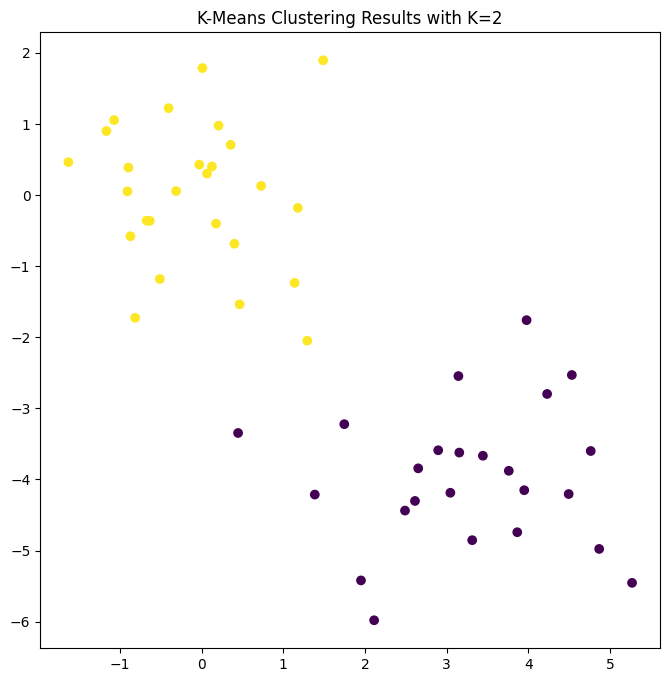

In [15]:
# Create a scatter plot to visualize the clustering results for K=2.
# The points are colored according to their assigned cluster labels.
fig , ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=2");

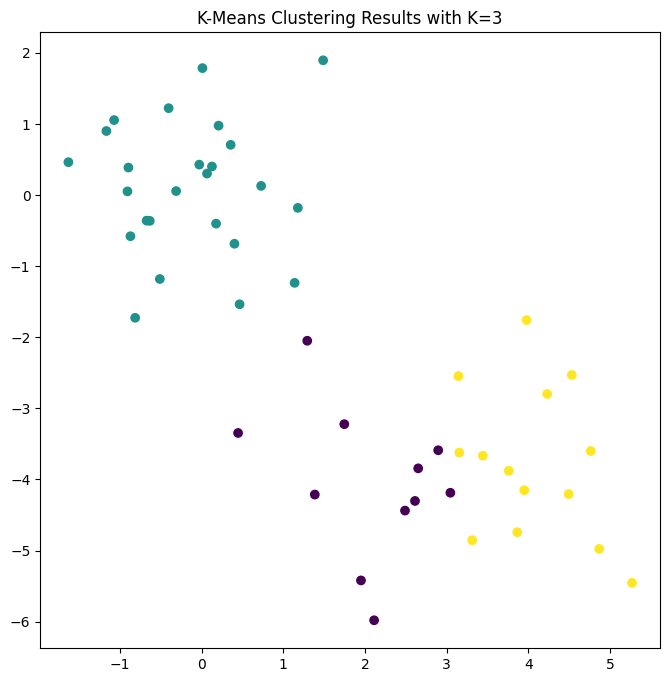

In [16]:
# Perform K-means clustering with 3 clusters.
# This demonstrates how the clusters change when a different number of clusters is specified.
kmeans = KMeans(n_clusters=3,
random_state=3,
n_init=20).fit(X)
fig , ax = plt.subplots(figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans.labels_)
ax.set_title("K-Means Clustering Results with K=3");

In [17]:
# Compare the inertia (within-cluster sum-of-squares) for two models.
# `kmeans1` has only 1 initialization, while `kmeans20` has 20.
# The inertia is a measure of how "tight" the clusters are, and a lower value is better.
# The comparison shows that more initializations (`n_init=20`) are likely to result in a better (lower) inertia.
kmeans1 = KMeans(n_clusters=3,
random_state=3,
n_init=1).fit(X)
kmeans20 = KMeans(n_clusters=3,
random_state=3,
n_init=20).fit(X);
kmeans1.inertia_ , kmeans20.inertia_

(76.85131986999251, 75.06261242745386)